# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#! pip install citipy

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [138]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
# set up base url with units in imperial
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url=f"{url}appid={api_keys}&units={units}&q="


# create empty lists to hold data
city_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

# set counters for data looping
record = 0
sets = 1

# gather weather data for cities
for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        
        #keep adding records and reset when record reaches 50
        if record == 50:
            record = 0
            sets = sets + 1
       
        else:
            record = record + 1
        
        # print out data
        print(f"Processing Record {record} of Set {sets} | {city}")
        
    except:
        print("City not found. Skipping...")


print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")




Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | provideniya
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | boguchany
Processing Record 4 of Set 1 | feijo
Processing Record 5 of Set 1 | megion
Processing Record 6 of Set 1 | yomou
Processing Record 7 of Set 1 | hermanus
City not found. Skipping...
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | bandarbeyla
Processing Record 11 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | ariquemes
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | palamos
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | mega
Processing Record 19 of Set 1 | punta arenas
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 |

Processing Record 31 of Set 4 | casambalangan
Processing Record 32 of Set 4 | dunedin
Processing Record 33 of Set 4 | dina
Processing Record 34 of Set 4 | hanmer springs
Processing Record 35 of Set 4 | hofn
Processing Record 36 of Set 4 | raudeberg
Processing Record 37 of Set 4 | esterhazy
Processing Record 38 of Set 4 | sao jose da coroa grande
Processing Record 39 of Set 4 | camacha
Processing Record 40 of Set 4 | presidencia roque saenz pena
Processing Record 41 of Set 4 | zalantun
City not found. Skipping...
Processing Record 42 of Set 4 | nizwa
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | aloleng
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | fort nelson
Processing Record 48 of Set 4 | totma
Processing Record 49 of Set 4 | umm kaddadah
Processing Record 50 of Set 4 | north bend
Processing Record 0 of Set 5 | sao filipe
Processing Record 1 of Set 5 | tortosa
Processing Record 2 of Set 

Processing Record 17 of Set 8 | bazarnyye mataki
Processing Record 18 of Set 8 | santa cruz de tenerife
Processing Record 19 of Set 8 | garoua
Processing Record 20 of Set 8 | burhar
Processing Record 21 of Set 8 | lata
Processing Record 22 of Set 8 | forestville
Processing Record 23 of Set 8 | salinopolis
Processing Record 24 of Set 8 | souillac
Processing Record 25 of Set 8 | dafeng
Processing Record 26 of Set 8 | gamba
Processing Record 27 of Set 8 | kavarna
Processing Record 28 of Set 8 | palmer
Processing Record 29 of Set 8 | snasa
Processing Record 30 of Set 8 | ilovlya
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | namatanai
Processing Record 33 of Set 8 | falmouth
City not found. Skipping...
Processing Record 34 of Set 8 | mabaruma
Processing Record 35 of Set 8 | waingapu
Processing Record 36 of Set 8 | dandong
Processing Record 37 of Set 8 | nishihara
Processing Record 38 of Set 8 | itoman
Processing Record 39 of Set 8 | cairns
Processing Record 40 o

Processing Record 5 of Set 12 | lakatoro
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 12 | antalaha
Processing Record 7 of Set 12 | pangnirtung
Processing Record 8 of Set 12 | vanimo
Processing Record 9 of Set 12 | baker city
Processing Record 10 of Set 12 | bejar
Processing Record 11 of Set 12 | ambilobe
Processing Record 12 of Set 12 | berbera
Processing Record 13 of Set 12 | kuybyshevskiy zaton
Processing Record 14 of Set 12 | coihaique
Processing Record 15 of Set 12 | durban
Processing Record 16 of Set 12 | hamada
Processing Record 17 of Set 12 | batticaloa
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [139]:
# convert to dataframe and set column names
df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": maxtemp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": windspeed_list,
    "Country": country_list,
    "Date": date_list
})

df.reset_index()

# send to csv file in output_data directory
df.to_csv("output_data/city_weather.csv", index=False)

#show output of dataframe
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,-10.28,91,100,12.08,RU,1644865919
1,Rikitea,-23.1203,-134.9692,78.44,68,91,9.42,PF,1644865920
2,Boguchany,58.3814,97.4531,-17.37,99,31,4.52,RU,1644865921
3,Feijó,-8.1642,-70.3536,85.21,61,99,2.26,BR,1644865921
4,Megion,61.0296,76.1136,-3.98,97,100,5.66,RU,1644865922


In [140]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,19.028274,14.864977,52.604689,70.354671,56.752595,8.392734,1.644866e+09
std,32.580425,88.565145,31.592249,23.315718,41.759226,6.489808,9.263808e+01
min,-54.800000,-175.200000,-43.960000,8.000000,0.000000,0.000000,1.644865e+09
25%,-7.923675,-63.554300,32.087500,60.000000,8.000000,3.945000,1.644866e+09
50%,21.555600,20.053500,63.185000,77.000000,74.000000,6.980000,1.644866e+09
75%,45.387575,87.927525,78.005000,88.000000,100.000000,11.135000,1.644866e+09
max,78.218600,178.416700,97.090000,100.000000,100.000000,50.760000,1.644866e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [141]:
checkhumidity=df.index[df["Humidity"]>=100].tolist()
print(checkhumidity)

[19, 55, 58, 74, 76, 96, 127, 140, 237, 249, 274, 308, 334, 356, 463, 482, 501, 524, 528]


In [142]:
#  Get the indices of cities that have humidity over 100%.
humiditydrop=df.index[df['Humidity']>=100]
print(humiditydrop)

Int64Index([ 19,  55,  58,  74,  76,  96, 127, 140, 237, 249, 274, 308, 334,
            356, 463, 482, 501, 524, 528],
           dtype='int64')


In [143]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=df.drop(humiditydrop, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,-10.28,91,100,12.08,RU,1644865919
1,Rikitea,-23.1203,-134.9692,78.44,68,91,9.42,PF,1644865920
2,Boguchany,58.3814,97.4531,-17.37,99,31,4.52,RU,1644865921
3,Feijó,-8.1642,-70.3536,85.21,61,99,2.26,BR,1644865921
4,Megion,61.0296,76.1136,-3.98,97,100,5.66,RU,1644865922
...,...,...,...,...,...,...,...,...,...
573,Kuybyshevskiy Zaton,55.1593,49.1701,16.38,95,96,6.02,RU,1644866121
574,Coyhaique,-45.5752,-72.0662,67.95,42,75,9.22,CL,1644866121
575,Durban,-29.8579,31.0292,76.01,86,100,3.00,ZA,1644866122
576,Hamada,34.8833,132.0833,39.00,72,53,15.61,JP,1644866122


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

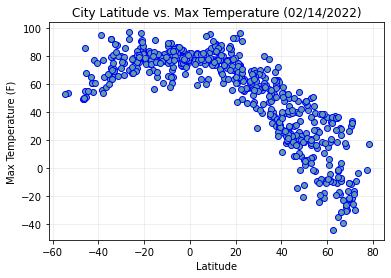

In [144]:
#Create scatter plot for latitude vs. max temp
plt.scatter(df["Lat"], df["Max Temp"],facecolor="cadetblue", edgecolor="b")

#add details to plot
plt.title("City Latitude vs. Max Temperature (02/14/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.25)

#save plot to png file
plt.savefig("output_data/lat_vs_temp_plot.png")

## Latitude vs. Humidity Plot

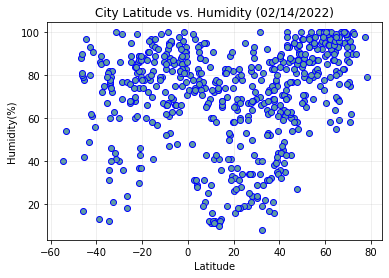

In [145]:
#Create scatter plot for latitude vs. max temp
plt.scatter(df["Lat"], df["Humidity"],facecolor="cadetblue", edgecolor="b")

#add details to plot
plt.title("City Latitude vs. Humidity (02/14/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(alpha=0.25)

#save plot to png file
plt.savefig("output_data/lat_vs_humidity_plot.png")

## Latitude vs. Cloudiness Plot

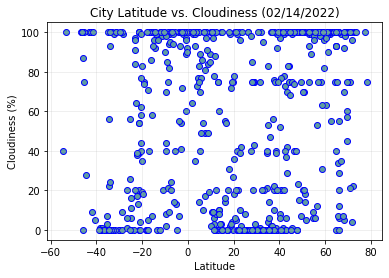

In [146]:
#Create scatter plot for latitude vs. max temp
plt.scatter(df["Lat"], df["Cloudiness"],facecolor="cadetblue", edgecolor="b")

#add details to plot
plt.title("City Latitude vs. Cloudiness (02/14/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.25)

#save plot to png file
plt.savefig("output_data/lat_vs_cloudiness_plot.png")

## Latitude vs. Wind Speed Plot

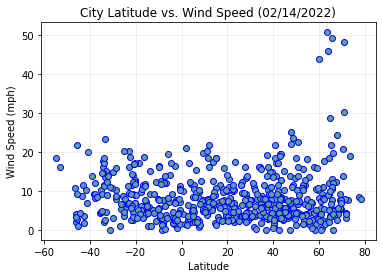

In [147]:
#Create scatter plot for latitude vs. max temp
plt.scatter(df["Lat"], df["Wind Speed"],facecolor="cadetblue", edgecolor="b")

#add details to plot
plt.title("City Latitude vs. Wind Speed (02/14/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.25)

#save plot to png file
plt.savefig("output_data/lat_vs_wind_plot.png")

## Linear Regression

In [148]:
north_hem = df.loc[df["Lat"] >= 0, :]
south_hem = df.loc[df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7619109449612538


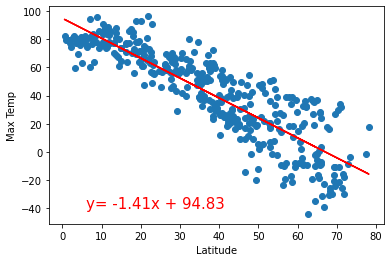

In [149]:
x_values= north_hem["Lat"]
y_values= north_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,-40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north_hem_temp_v_lat_plot.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.18857649888936132


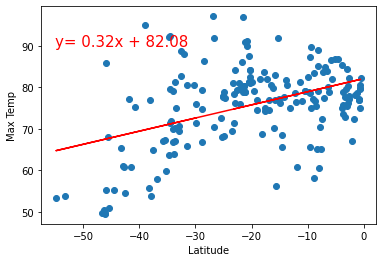

In [150]:
x_values= south_hem["Lat"]
y_values= south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,90), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south_hem_temp_v_lat_plot.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.221691185428273


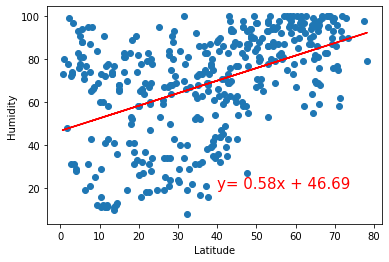

In [151]:
x_values= north_hem["Lat"]
y_values= north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north_hem_cloudiness_v_lat_plot.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0936852440303493


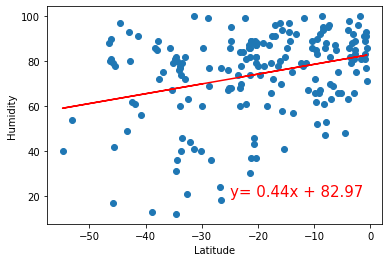

In [152]:
x_values= south_hem["Lat"]
y_values= south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south_hem_humudity_v_lat_plot.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.048963638411834653


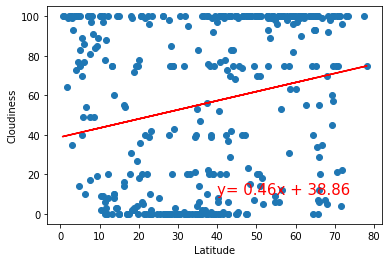

In [153]:
x_values= north_hem["Lat"]
y_values= north_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north_hem_cloudiness_v_lat_plot.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07152857879693715


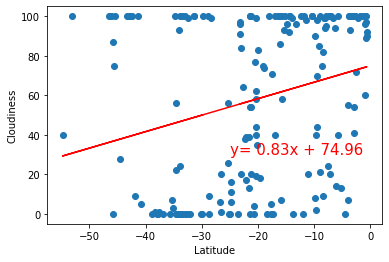

In [154]:
x_values= south_hem["Lat"]
y_values= south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25,30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south_hem_cloudiness_v_lat_plot.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.022561360347329758


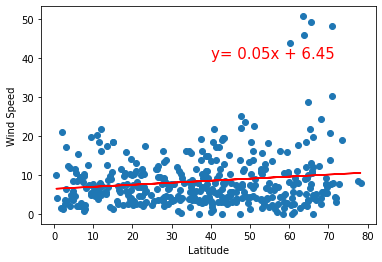

In [155]:
x_values= north_hem["Lat"]
y_values= north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north_hem_wind_v_lat_plot.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0637463904194981


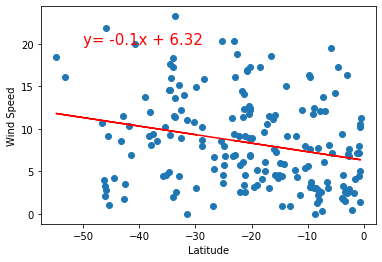

In [156]:
x_values= south_hem["Lat"]
y_values= south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values=x_values * slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south_hem_wind_v_lat_plot.png")
plt.show()
